# Proyecto 1 Procesamiento de imágenes Archivo

Alejandro García y Luna Duran

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

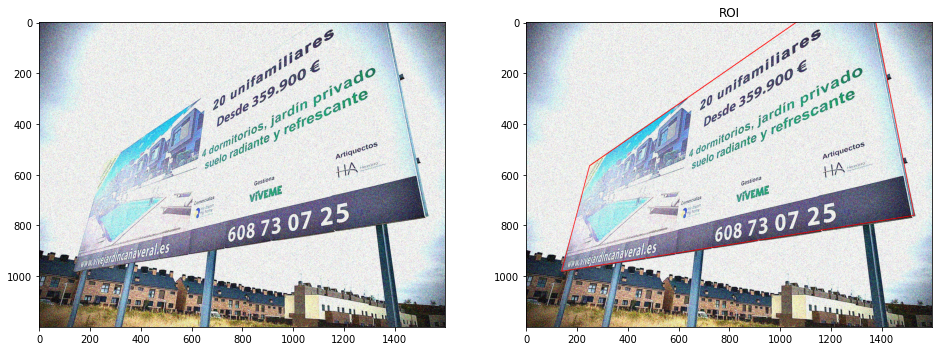

In [2]:
# cargamos la imagen
img = cv2.imread('Billboard_1600x1200.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
M, N, C = img_rgb.shape
img_rgb_lines = img_rgb.copy() # copia

#tomamos los puntos de la region de interes
org_pts = [[250, 565], [1340, -190], [140, 980], [1530, 760]]
cv2.line(img_rgb_lines,tuple(org_pts[0]),tuple(org_pts[1]),(255,0,0),2)
cv2.line(img_rgb_lines,tuple(org_pts[1]),tuple(org_pts[3]),(255,0,0),2)
cv2.line(img_rgb_lines,tuple(org_pts[3]),tuple(org_pts[2]),(255,0,0),2)
cv2.line(img_rgb_lines,tuple(org_pts[2]),tuple(org_pts[0]),(255,0,0),2)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img_rgb)
plt.subplot(122)
plt.title('ROI')
plt.imshow(img_rgb_lines)

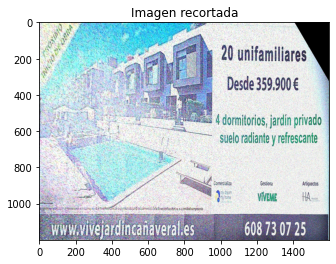

In [3]:
dest_pts = [[0, 0], [N, 0], [0, M],[N, M]]
MT = cv2.getPerspectiveTransform(np.float32(org_pts),np.float32(dest_pts))# matris de tranformacion
img_rgb_new = cv2.warpPerspective(img_rgb, MT, (N, M))
plt.title('Imagen recortada')
plt.imshow(img_rgb_new)

In [27]:
#modificar brillo en -30 de la imagen
'''
img_rgb_new= np.uint8((img_trans-20)*0.85)
hist_rgb_n= cv2.calcHist([img_rgb_new], [0], None, [256], [0,256])
hist_rgb= cv2.calcHist([img_trans], [0], None, [256], [0,256])



plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Imagen original')
plt.imshow(img_trans)

plt.subplot(122)
plt.title('Lena gris -30 brillo')
plt.imshow(img_rgb_new)
plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize= (16, 16))
plt.subplot(121)
plt.title('Lena histograma')
plt.stem(hist_rgb)


plt.subplot(122)
plt.title('Lena histograma -30 brillo')
plt.stem(hist_rgb_n)
plt.show()
'''

"\nimg_rgb_new= np.uint8((img_trans-20)*0.85)\nhist_rgb_n= cv2.calcHist([img_rgb_new], [0], None, [256], [0,256])\nhist_rgb= cv2.calcHist([img_trans], [0], None, [256], [0,256])\n\n\n\nplt.figure(figsize=(16,16))\nplt.subplot(121)\nplt.title('Imagen original')\nplt.imshow(img_trans)\n\nplt.subplot(122)\nplt.title('Lena gris -30 brillo')\nplt.imshow(img_rgb_new)\nplt.xticks([]), plt.yticks([])\n\nplt.show()\n\nplt.figure(figsize= (16, 16))\nplt.subplot(121)\nplt.title('Lena histograma')\nplt.stem(hist_rgb)\n\n\nplt.subplot(122)\nplt.title('Lena histograma -30 brillo')\nplt.stem(hist_rgb_n)\nplt.show()\n"

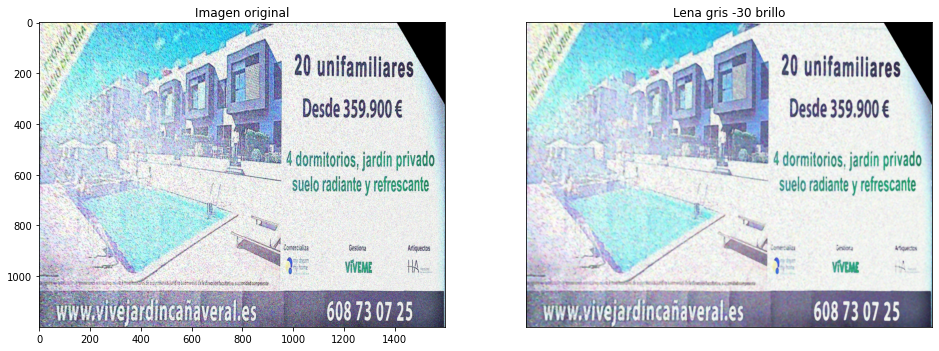

In [4]:
median = cv2.medianBlur(img_rgb_new, 7)


plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Imagen original')
plt.imshow(img_rgb_new)

plt.subplot(122)
plt.title('Lena gris -30 brillo')
plt.imshow(median)
plt.xticks([]), plt.yticks([])

plt.show()

Text(0.5, 1.0, 'Azul original')

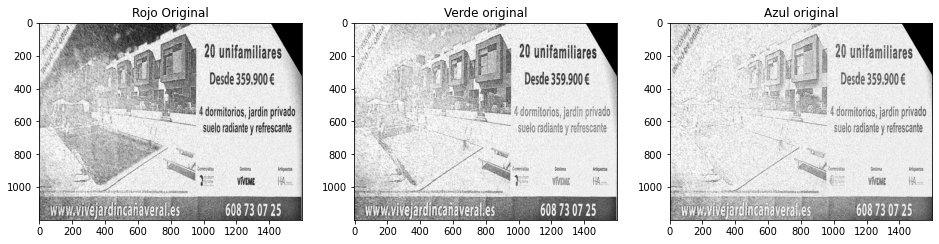

In [5]:
R, G, B = cv2.split(img_rgb_new)
zero_c = np.zeros((M,N),np.uint8)


plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(R, cmap = 'gray')
plt.title('Rojo Original')

plt.subplot(132)
plt.imshow(G, cmap = 'gray')
plt.title('Verde original')

plt.subplot(133)
plt.imshow(B, cmap = 'gray')
plt.title('Azul original')

In [6]:

img_r_new= np.uint8((R))
img_g_new= np.uint8((G))
img_b_new= np.uint8((B))

Text(0.5, 1.0, 'Azul original')

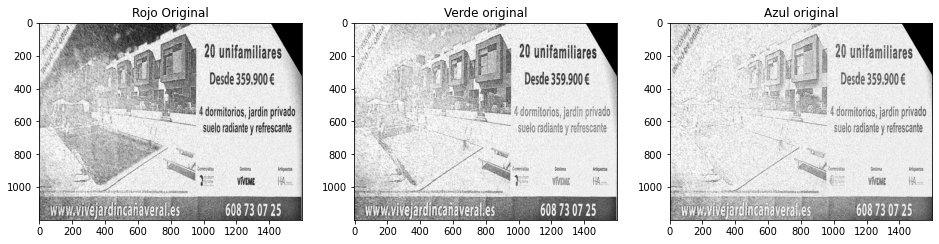

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(img_r_new, cmap = 'gray')
plt.title('Rojo Original')

plt.subplot(132)
plt.imshow(img_g_new, cmap = 'gray')
plt.title('Verde original')

plt.subplot(133)
plt.imshow(img_b_new, cmap = 'gray')
plt.title('Azul original')

In [60]:
Rm = cv2.bilateralFilter(img_r_new,31,20,100)
Gm = cv2.bilateralFilter(img_g_new,31,20,100)
Bm = cv2.bilateralFilter(img_b_new,31,20,100)
new_img = cv2.merge([Rm, Gm, Bm])

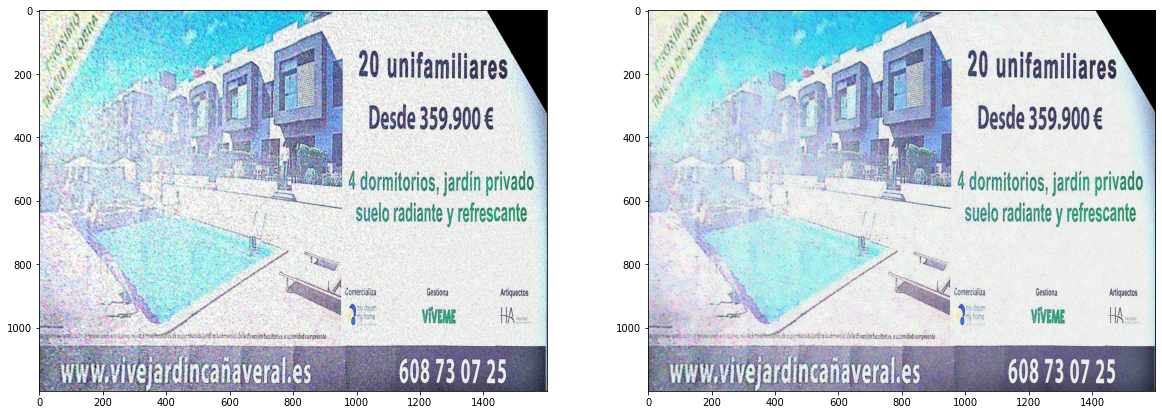

In [61]:
plt.figure(figsize=(20,20))
'''
plt.subplot(421)
plt.imshow(R, cmap = 'gray')
plt.title('Rojo Original')
plt.subplot(422)
plt.imshow(Rm, cmap = 'gray')
plt.title('Rojo Transformadas')
plt.subplot(423)
plt.imshow(G, cmap = 'gray')
plt.title('Verde original')
plt.subplot(424)
plt.imshow(Gm, cmap = 'gray')
plt.title('Verde Transformadas')
plt.subplot(425)
plt.imshow(B, cmap = 'gray')
plt.title('Azul original')
plt.subplot(426)
plt.imshow(Bm, cmap = 'gray')
plt.title('Azul Transformadas')
'''
plt.subplot(221)
plt.imshow(img_rgb_new)
plt.subplot(222)
plt.imshow(new_img)


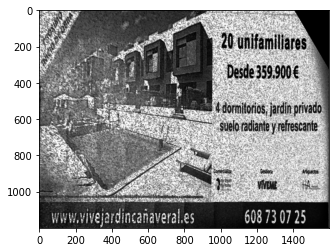

In [26]:
new_img_g = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)
img_gray_new= np.uint8(cv2.equalizeHist(new_img_g))

img_gray_2 = cv2.cvtColor(img_gray_new, cv2.COLOR_GRAY2RGB)

plt.figure()
plt.imshow(img_gray_2)
plt.show()


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
cathedral_gray = rgb2gray(cathedral)
ax[0].imshow(cathedral_gray, cmap='gray')
ax[0].set_title('Grayscale Image')
ax1 = ax[1]
ax2 = ax1.twinx()
freq_h, bins_h = histogram(cathedral_gray)
freq_c, bins_c = cumulative_distribution(cathedral_gray)
ax1.step(bins_h, freq_h*1.0/freq_h.sum(), c='b', label='PDF')
ax2.step(bins_c, freq_c, c='r',  label='CDF')
ax1.set_ylabel('PDF', color='b')
ax2.set_ylabel('CDF', color='r')
ax[1].set_xlabel('Intensity value')
ax[1].set_title('Histogram of Pixel Intensity');